In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("netflix_reviews.csv")

In [48]:
df.fillna('', inplace=True) # Otherwise stuff doesn't work

In [49]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,,2024-06-26 15:38:06,
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,,2024-06-24 15:29:54,
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,,2024-06-22 15:41:54,
3,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626
4,9ac001b4-a47e-4aba-981f-4679345a9664,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1,8,,2024-06-18 09:52:52,


In [50]:
df.describe()

,score,thumbsUpCount
count,113609.000000,113609.000000
mean,2.812620,10.434816
std,1.700549,101.013851
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


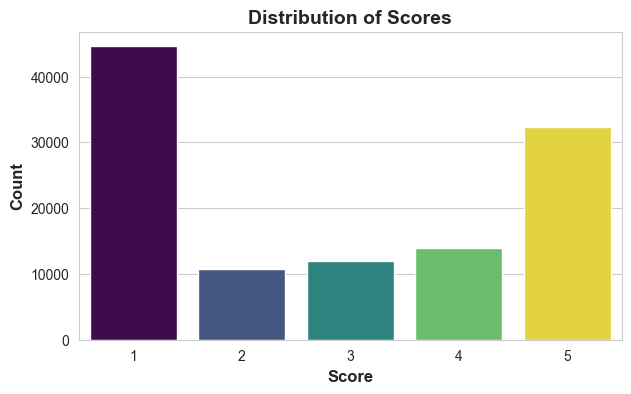

In [51]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyzing score distribution
score_counts = df['score'].value_counts().sort_index()

# Create a larger figure size for better visibility
plt.figure(figsize=(7, 4))

# Create a bar plot with a custom color palette, adjusting for deprecation warning
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette='viridis', legend=False)

# Enhancing the label readability
plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Scores', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

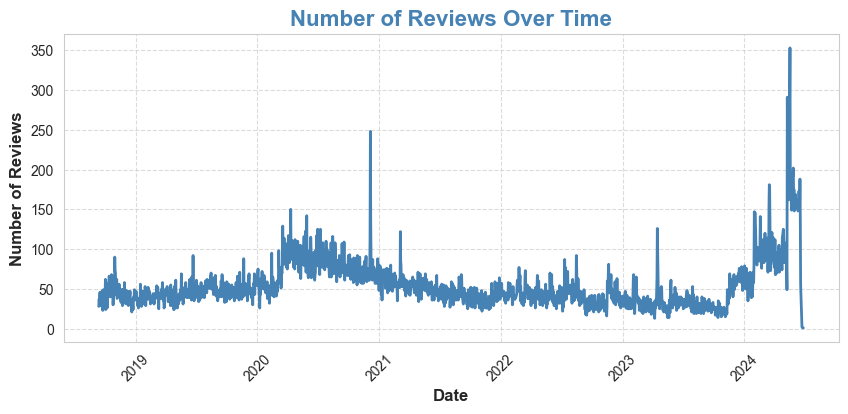

In [52]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Convert 'at' column to datetime and extract dates
df['review_date'] = pd.to_datetime(df['at']).dt.date

# Aggregate counts per date and sort
date_counts = df['review_date'].value_counts().sort_index()

# Create a larger figure size for better visibility
plt.figure(figsize=(10, 4))

# Plot data with a better color choice
date_counts.plot(kind='line', color='steelblue', lw=2)  # lw is line width

# Enhancing the label readability
plt.title('Number of Reviews Over Time', fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')

# Format the date on the x-axis for better readability
plt.xticks(rotation=45)

# Enable grid and set properties for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

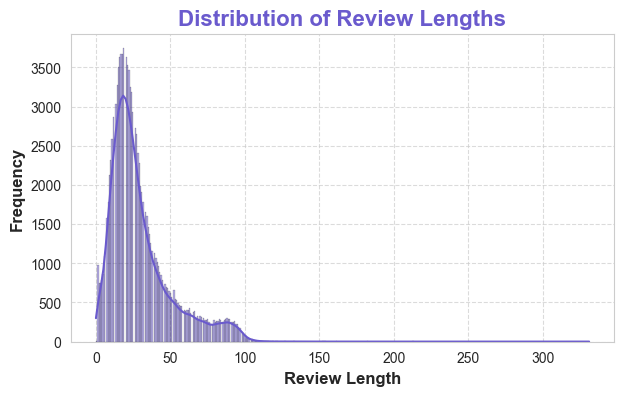

In [53]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate review length
df['review_length'] = df['content'].apply(lambda x: len(x.split()))

# Create a figure with improved dimensions
plt.figure(figsize=(7, 4))

# Plot the histogram with a kernel density estimate
# Corrected to ensure the DataFrame is referred as 'data' not 'df'
sns.histplot(data=df, x='review_length', color='slateblue', kde=True, edgecolor='black')

# Enhancing the label readability
plt.title('Distribution of Review Lengths', fontsize=16, fontweight='bold', color='slateblue')
plt.xlabel('Review Length', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Enable grid and set properties for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()